In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-dataset/Copy of loan.xlsx


**importing the libraies**

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

**import dataset**

In [6]:
df=pd.read_excel("/kaggle/input/loan-dataset/Copy of loan.xlsx")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [76]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**creating new coloum**-LoanAmount_log

<Axes: >

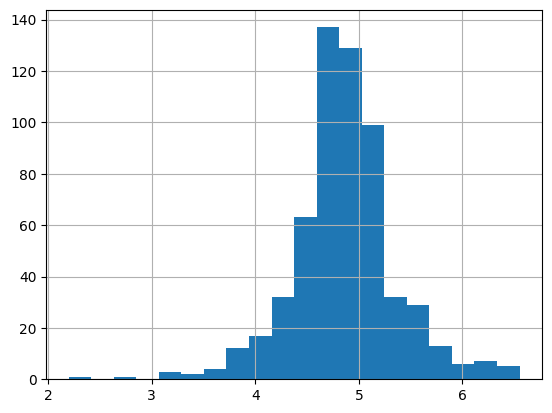

In [77]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [78]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

**Creating new coloum**-TotalIncome & TotalIncome_log

<Axes: >

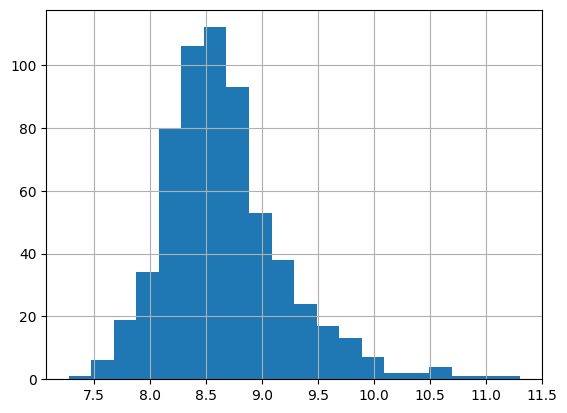

In [79]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

**filling all null values**

In [80]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['LoanAmount_log'].fillna(df['LoanAmount_log'].mode()[0],inplace=True)
df.isnull().sum()

/tmp/ipykernel_33/1840441587.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
/tmp/ipykernel_33/1840441587.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

**let's divide the data to testing and training**

In [81]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values

x

array([['Male', 'No', 0.0, ..., 1.0, 4.787491742782046, 5849.0],
       ['Male', 'Yes', 1.0, ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', 0.0, ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', 1.0, ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', 2.0, ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', 0.0, ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [82]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

**let's check the null percentage of the gender**

In [83]:
print('percent of missing gender is %2f%%'%((df['Gender'].isnull().sum()/df.shape[0])*100))

percent of missing gender is 0.000000%


**let's know the people who has taken the loan on gender basis**

number of people who take loan as group by gender:
Gender
Male      502
Female    112
Name: count, dtype: int64


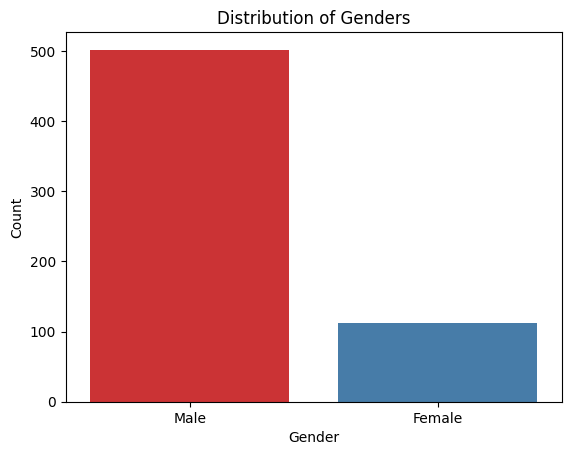

In [84]:
print("number of people who take loan as group by gender:")
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df,palette='Set1')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Genders')
plt.show()

number of people who take loan as group by Married:
Married
Yes    401
No     213
Name: count, dtype: int64


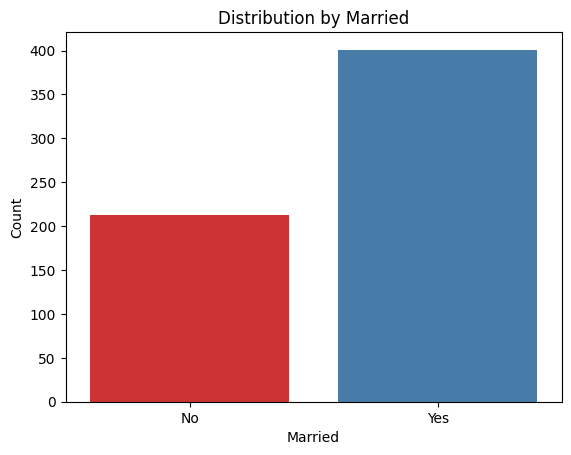

In [85]:
print("number of people who take loan as group by Married:")
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df,palette='Set1')
plt.xlabel('Married')
plt.ylabel('Count')
plt.title('Distribution by Married')
plt.show()

number of people who take loan as group by Dependents:
Dependents
0.0    360
1.0    102
2.0    101
3.0     51
Name: count, dtype: int64


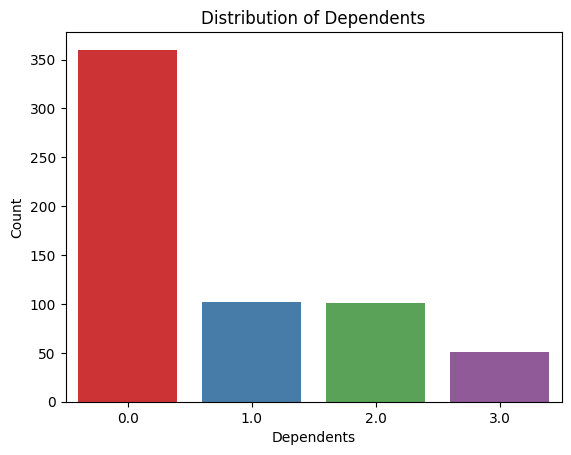

In [86]:
print("number of people who take loan as group by Dependents:")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df,palette='Set1')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Distribution of Dependents')
plt.show()

number of people who take loan as group by Self_Employed:
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


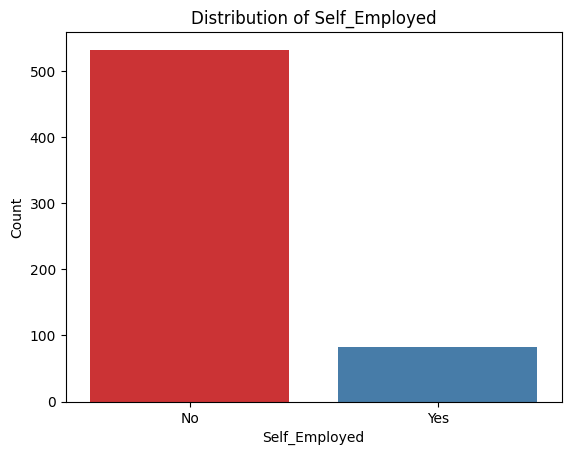

In [87]:
print("number of people who take loan as group by Self_Employed:")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=df,palette='Set1')
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.title('Distribution of Self_Employed')
plt.show()

number of people who take loan as group by LoanAmount:
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


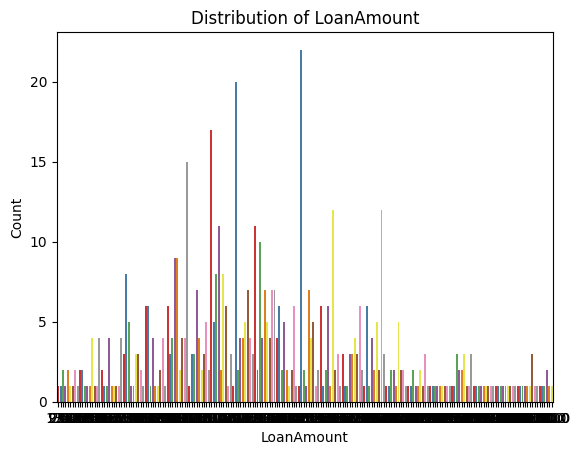

In [88]:
print("number of people who take loan as group by LoanAmount:")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount',data=df,palette='Set1')
plt.xlabel('LoanAmount')
plt.ylabel('Count')
plt.title('Distribution of LoanAmount')
plt.show()

number of people who take loan as group by Credit_History:
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


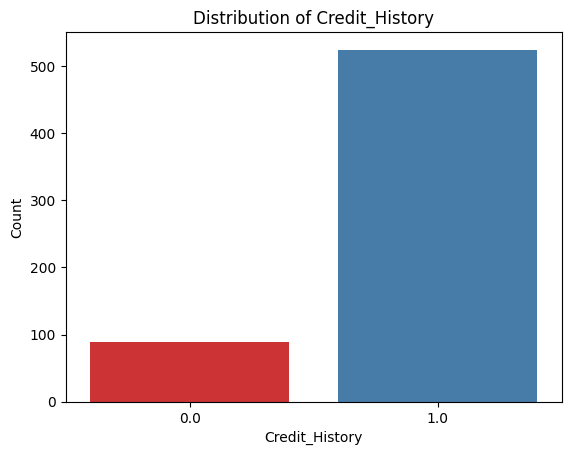

In [89]:
print("number of people who take loan as group by Credit_History:")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=df,palette='Set1')
plt.xlabel('Credit_History')
plt.ylabel('Count')
plt.title('Distribution of Credit_History')
plt.show()

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_x=LabelEncoder()

**let's fit and transform the x train data**

In [91]:
for i in range(0,5):
    if isinstance(x_train[:, i][0], str):
        x_train[:,i]=Labelencoder_x.fit_transform(x_train[:,i])
    if isinstance(x_train[:, 7][0], str):
        x_train[:,7]=Labelencoder_x.fit_transform(x_train[:,7])
x_train

array([[1, 1, 0.0, ..., 1.0, 4.875197323201151, 5858.0],
       [1, 0, 1.0, ..., 1.0, 5.278114659230517, 11250.0],
       [1, 1, 0.0, ..., 0.0, 5.003946305945459, 5681.0],
       ...,
       [1, 1, 3.0, ..., 1.0, 5.298317366548036, 8334.0],
       [1, 1, 0.0, ..., 1.0, 5.075173815233827, 6033.0],
       [0, 1, 0.0, ..., 1.0, 5.204006687076795, 6486.0]], dtype=object)

In [92]:
Labelencoder_y=LabelEncoder()
y_train=Labelencoder_y.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [93]:
for i in range(0,5):
    if isinstance(x_test[:, i][0], str):
        x_test[:,i]=Labelencoder_x.fit_transform(x_test[:,i])
    if isinstance(x_test[:, 7][0], str):
        x_test[:,7]=Labelencoder_x.fit_transform(x_test[:,7])
x_test

array([[1, 0, 0.0, 0, 360.0, 1.0, 4.430816798843313, 7085.0],
       [0, 0, 0.0, 0, 360.0, 1.0, 4.718498871295094, 4230.0],
       [1, 1, 0.0, 0, 360.0, 1.0, 5.780743515792329, 10039.0],
       [1, 1, 0.0, 0, 360.0, 1.0, 4.700480365792417, 6784.0],
       [1, 1, 2.0, 0, 360.0, 1.0, 4.574710978503383, 3875.0],
       [1, 1, 0.0, 1, 180.0, 0.0, 5.10594547390058, 6058.0],
       [1, 1, 3.0, 0, 180.0, 1.0, 5.056245805348308, 6417.0],
       [1, 0, 0.0, 0, 360.0, 1.0, 6.003887067106539, 12876.0],
       [1, 0, 0.0, 0, 342.0, 0.0, 4.820281565605037, 5124.0],
       [1, 1, 0.0, 0, 360.0, 1.0, 4.852030263919617, 5233.0],
       [0, 0, 0.0, 0, 360.0, 1.0, 4.430816798843313, 2917.0],
       [1, 1, 1.0, 0, 360.0, 1.0, 4.553876891600541, 2895.0],
       [0, 0, 0.0, 0, 360.0, 1.0, 5.634789603169249, 8333.0],
       [1, 1, 2.0, 0, 360.0, 1.0, 5.4638318050256105, 8667.0],
       [1, 1, 0.0, 0, 360.0, 1.0, 4.564348191467836, 14880.0],
       [1, 1, 1.0, 0, 360.0, 1.0, 4.204692619390966, 3875.0],
     

In [94]:
Labelencoder_y=LabelEncoder()
y_test=Labelencoder_y.fit_transform(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

**importing standard scalar**

In [96]:
x_train[:, i] = [str(val).strip('+') for val in x_train[:, i]]

In [72]:
df=pd.read_excel("/kaggle/input/loan-dataset/Copy of loan.xlsx")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [73]:
df['Dependents'].replace('3+', 3,inplace=True)

df

/tmp/ipykernel_33/355140651.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].replace('3+', 3,inplace=True)
/tmp/ipykernel_33/355140651.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dependents'].replace('3+', 3,inplace=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [97]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [102]:
from sklearn import metrics
y_pred=rf_clf.predict(x_test)
print('accuracy of the random forest classifier is',metrics.accuracy_score(y_pred,y_test))

y_pred


accuracy of the random forest classifier is 0.7398373983739838


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [103]:
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()
nb_clf.fit(x_train,y_train)

GaussianNB()

In [104]:
y_pred=nb_clf.predict(x_test)
print('accuracy of gaussian is %.',metrics.accuracy_score(y_pred,y_test))

accuracy of gaussian is %. 0.8373983739837398


In [105]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [107]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [108]:
y_pred=dt_clf.predict(x_test)
print("accuracy of DecisionTree is ",metrics.accuracy_score(y_pred,y_test))

accuracy of DecisionTree is  0.7154471544715447


In [109]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [115]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf=KNeighborsClassifier()
kn_clf.fit(x_train,y_train)

KNeighborsClassifier()

In [116]:
y_pred=kn_clf.predict(x_test)
print("accuracy of the KNeighbors is ",metrics.accuracy_score(y_pred,y_test))

accuracy of the KNeighbors is  0.7967479674796748


In [117]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])